/var/folders/rj/hvhr7fkx22vgxz1lwdg4gqsh0000gn/T/ipykernel_1022/3718572275.py:15: DeprecationWarning: 'aifc' is deprecated and slated for removal in Python 3.13
  from aifc import Error



0: 480x640 1 leaf, 156.8ms
Speed: 2.1ms preprocess, 156.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 leaf, 122.1ms
Speed: 1.5ms preprocess, 122.1ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 leaf, 107.7ms
Speed: 2.2ms preprocess, 107.7ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 leaf, 97.5ms
Speed: 1.3ms preprocess, 97.5ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 leaf, 93.4ms
Speed: 1.0ms preprocess, 93.4ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 leaf, 93.2ms
Speed: 1.7ms preprocess, 93.2ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 93.5ms
Speed: 1.1ms preprocess, 93.5ms inference, 0.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 leaf, 94.3ms
Speed: 1.4ms preprocess, 94.3ms inference, 0.3ms postprocess per image at shape (1, 3, 480

Found 37094 images belonging to 25 classes.
Following is our prediction:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


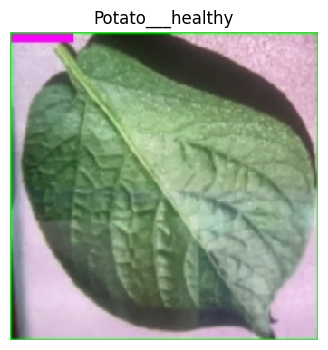

In [1]:
import cv2
import cvzone
import time
from matplotlib import pyplot as plt
from ultralytics import YOLO
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
import numpy as np
from PIL import Image
import tensorflow as tf
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
from PIL import Image
from aifc import Error
import sqlite3
import sys
from PyQt5.QtWidgets import QApplication, QLabel, QVBoxLayout, QWidget, QPushButton,QSizePolicy, QTextEdit
from PyQt5.QtGui import QPixmap, QFont, QIcon
from PyQt5.QtCore import Qt
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator



classNames = ["leaf"]
confidence_threshold = 0.7
box_scale = 1

start_time = time.time()

cap = cv2.VideoCapture(0)  # For Webcam
cap.set(3, 640)
cap.set(4, 480)

model = YOLO("best.pt")

start_time = time.time()
save_img = False
conf_above_threshold_time = None

while True:
    success, img = cap.read()
    img = cv2.flip(img, 1)

    results = model(img, stream=True)

    for r in results:
        boxes = r.boxes
        for box in boxes:
            conf = box.conf.item()
            if conf > confidence_threshold:
                if conf_above_threshold_time is None:
                    conf_above_threshold_time = time.time()

                x1, y1, x2, y2 = box.xyxy[0]
                x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

                img = cv2.GaussianBlur(img, (3, 3), 0)

                width = int((x2 - x1) * box_scale)
                height = int((y2 - y1) * box_scale)
                x1 = max(0, int(x1 + (x2 - x1) * (1 - box_scale) / 2))
                y1 = max(0, int(y1 + (y2 - y1) * (1 - box_scale) / 2))
                x2 = min(img.shape[1], x1 + width)
                y2 = min(img.shape[0], y1 + height)

                cls = int(box.cls[0])
                cvzone.putTextRect(img, f'{classNames[cls]} {conf:.2f}', (max(0, x1), max(35, y1)), scale=1, thickness=1)

                # Kutu içeriğini kutu ile vurgula
                cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

                if conf > 0.75 and not save_img:
                    elapsed_time_above_threshold = time.time() - conf_above_threshold_time
                    if elapsed_time_above_threshold >= 3:
                        filename = "yaprak.JPG"
                        # Calculate the center of the ROI
                        center_x = (x1 + x2) // 2
                        center_y = (y1 + y2) // 2
                          # Calculate the new width and height to control zoom
                        new_width = int((x2 - x1) * box_scale)
                        new_height = int((y2 - y1) * box_scale)
                         # Adjust the new x and y positions to maintain the center
                        new_x1 = max(0, center_x - new_width // 2)
                        new_y1 = max(0, center_y - new_height // 2)
                        new_x2 = min(img.shape[1], new_x1 + new_width)
                        new_y2 = min(img.shape[0], new_y1 + new_height)
                        # Resize the image to 1920 x 1080 before saving
                        new_img = cv2.resize(img[new_y1:new_y2, new_x1:new_x2], (256, 256))
                        cv2.imwrite(filename, new_img, [cv2.IMWRITE_PNG_COMPRESSION, 0])
                        save_img = True
                        conf_above_threshold_time = None
                else:
                    conf_above_threshold_time = None

    end_time = time.time()
    
    start_time = end_time

    cv2.imshow("Image", img)

    if cv2.waitKey(1) & 0xFF == ord('q') or save_img:
        break

cap.release()
cv2.destroyAllWindows()




model = tf.keras.models.load_model('mobilenetv2_model4.h5')


train_dir = "/Users/resit/Desktop/BitirmeProjesi/dataset/train"
train_datagen_aug = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   fill_mode="nearest",
                                   rotation_range = 20,
                                   width_shift_range=0.2,
                                    height_shift_range=0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2) # set validation split
training_set_aug = train_datagen_aug.flow_from_directory(directory= train_dir,
                                               target_size=(224, 224), # As we choose 64*64 for our convolution model
                                               batch_size=128,
                                               class_mode='categorical',
                                               subset='training')

class_dict = training_set_aug.class_indices
li = list(class_dict.keys())

image_path = "yaprak.JPG"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = model.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]
        sqlİndex = index



def veri_tabanindan_veri_cek():
    try:
        # SQLite veritabanına bağlantı oluştur
        baglanti = sqlite3.connect('bitki_veritabani.db')
        cursor = baglanti.cursor()

        # # Veritabanından hastalıkları çek
        # cursor.execute("SELECT hastaliklar FROM bitki")
        # hastaliklar = [row[0] for row in cursor.fetchall()]

        # # Veritabanından açıklamaları çek
        # cursor.execute("SELECT aciklama FROM bitki")
        # aciklamalar = [row[0] for row in cursor.fetchall()]

        # # Veritabanından tedavileri çek
        # cursor.execute("SELECT tedavi FROM bitki")
        # tedaviler = [row[0] for row in cursor.fetchall()]


        # Veritabanından hastalıkları çek
        cursor.execute("SELECT hastalik_adi FROM hastaliklar")
        hastaliklar = [row[0] for row in cursor.fetchall()]

        # Veritabanından açıklamaları çek
        cursor.execute("SELECT Açıklama FROM hastaliklar")
        aciklamalar = [row[0] for row in cursor.fetchall()]

        # Veritabanından tedavileri çek
        cursor.execute("SELECT Tedavi FROM hastaliklar")
        tedaviler = [row[0] for row in cursor.fetchall()]





        # Veritabanı bağlantısını kapat
        baglanti.close()

        return hastaliklar, aciklamalar, tedaviler
    except sqlite3.Error as hata:
        print("Veritabanı Hatası:", hata)
        return None, None, None

# Fonksiyonu çağırarak verileri al
hastaliklar, aciklamalar, tedaviler = veri_tabanindan_veri_cek()

hastalik_ismi = hastaliklar[sqlİndex-1] 
aciklama_ismi = aciklamalar[sqlİndex-1] 
tedavi_ismi = tedaviler[sqlİndex-1]


# Sonuçları göstermek için PyQt5 penceresi oluşturma
app = QApplication(sys.argv)
window = QWidget()
window.setWindowTitle("Bitki Hastalığı Tespiti Sonuçları")
# window.setWindowIcon(QIcon("path/to/your/icon.png"))  # İstediğiniz ikonu belirtin

# Pencere içeriği için düzen oluşturma
layout = QVBoxLayout()

# "yaprak.png" görüntüsünü yükleyin ve boyutunu küçültün
image_path = "yaprak.JPG"
img = Image.open(image_path)
img = img.resize((640, 480))  # Yeni boyutu burada ayarlayabilirsiniz
img.save("yaprak.JPG")

# Yeni boyutlu görüntüyü PyQt5 penceresine ekleyin
label_image = QLabel()
pixmap = QPixmap("yaprak.JPG")
label_image.setPixmap(pixmap)
label_image.setAlignment(Qt.AlignCenter)
layout.addWidget(label_image)

# Hastalık bilgisini ekleyin
font = QFont()
font.setPointSize(14)

label_hastalik = QLabel(f"Hastalık: {hastalik_ismi}")
label_hastalik.setFont(font)
label_hastalik.setAlignment(Qt.AlignCenter)
layout.addWidget(label_hastalik)

# Açıklama metnini ekleyin (QTextEdit kullanıyoruz)
text_edit_aciklama = QTextEdit()
text_edit_aciklama.setFont(font)
text_edit_aciklama.setPlainText(aciklama_ismi)
text_edit_aciklama.setReadOnly(True)  # Metni düzenlemeyi engelliyoruz
layout.addWidget(text_edit_aciklama)

# Tedavi bilgisini ekleyin
label_tedavi = QLabel(f"Tedavi: {tedavi_ismi}")
label_tedavi.setFont(font)
label_tedavi.setAlignment(Qt.AlignCenter)
layout.addWidget(label_tedavi)

# Pencereyi düzene ekleme ve gösterme
window.setLayout(layout)
window.show()
#ploting image with predicted class name        
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)

plt.show()

sys.exit(app.exec_())



